In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('subwaytime.csv', encoding='euckr')

df.drop(['사용월', '역ID'], axis=1, inplace=True)
temp = []
for i in range(24):
    for j in ['승차', '하차']:
        temp.append(str(i)+j)
temp=temp[8:]+temp[:8]


col = list(df.columns[:2])+temp
df.columns = col
df = df.drop(0)
df.head()

,호선명,지하철역,4승차,4하차,5승차,5하차,6승차,6하차,7승차,7하차,...,23승차,23하차,0승차,0하차,1승차,1하차,2승차,2하차,3승차,3하차
1,1호선,서울역,927,22,10682,8774,13504,45545,39110,103863,...,33149,19442,3612,7167,0,410,0,0,0,0
2,1호선,시청,74,0,2409,4049,3532,19241,7703,66876,...,14478,4079,981,1256,3,29,0,0,0,0
3,1호선,종각,100,8,4409,5105,4593,26969,6733,104259,...,54264,5560,4886,1722,0,0,0,0,0,0
4,1호선,종로3가,122,4,5061,2520,3876,12832,6066,29381,...,25970,5503,3214,2471,0,52,0,0,0,0
5,1호선,종로5가,43,2,1934,3590,2935,14991,5143,40376,...,12013,3450,785,980,1,3,0,0,0,0


In [3]:
# 데이터타입을 numeric으로 
for i in df.columns[2:]:
    df[i] = pd.to_numeric(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 1 to 598
Data columns (total 50 columns):
호선명     598 non-null object
지하철역    598 non-null object
4승차     598 non-null int64
4하차     598 non-null int64
5승차     598 non-null int64
5하차     598 non-null int64
6승차     598 non-null int64
6하차     598 non-null int64
7승차     598 non-null int64
7하차     598 non-null int64
8승차     598 non-null int64
8하차     598 non-null int64
9승차     598 non-null int64
9하차     598 non-null int64
10승차    598 non-null int64
10하차    598 non-null int64
11승차    598 non-null int64
11하차    598 non-null int64
12승차    598 non-null int64
12하차    598 non-null int64
13승차    598 non-null int64
13하차    598 non-null int64
14승차    598 non-null int64
14하차    598 non-null int64
15승차    598 non-null int64
15하차    598 non-null int64
16승차    598 non-null int64
16하차    598 non-null int64
17승차    598 non-null int64
17하차    598 non-null int64
18승차    598 non-null int64
18하차    598 non-null int64
19승차    598 non-null int64
19

In [20]:
# matplotlib 한글화 코드
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

['4승차', '5승차', '6승차', '7승차', '8승차', '9승차', '10승차', '11승차', '12승차', '13승차', '14승차', '15승차', '16승차', '17승차', '18승차', '19승차', '20승차', '21승차', '22승차', '23승차', '0승차', '1승차', '2승차', '3승차']


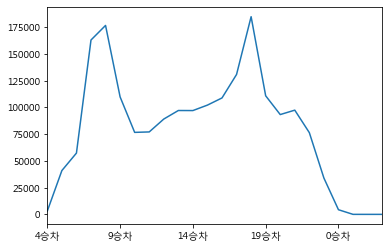

In [22]:
#신도림역의 시간대별 승차인원값을 추출하고 차트로 그려 나타내기

SDR = df[(df.지하철역=='신도림')].sum()[2::2]
SDR.plot()
#for i in 

['4승차', '5승차', '6승차', '7승차', '8승차', '9승차', '10승차', '11승차', '12승차', '13승차', '14승차', '15승차', '16승차', '17승차', '18승차', '19승차', '20승차', '21승차', '22승차', '23승차', '0승차', '1승차', '2승차', '3승차']


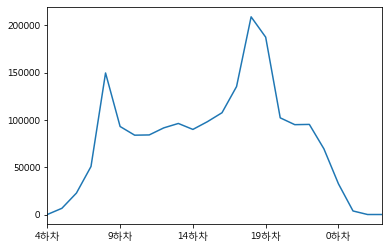

In [23]:
#신도림역의 시간대별 하차인원값을 추출하고 차트로 그려 나타내기

SDR = df[(df.지하철역=='신도림')].sum()[3::2]
SDR.plot()

In [29]:
# 전시간 승하차 다합쳐 이용객 최다역
df['total'] = df.iloc[2:].sum(axis=1)
df.sort_values('total',ascending=False ).head(10)

,호선명,지하철역,4승차,4하차,5승차,5하차,6승차,6하차,7승차,7하차,...,23하차,0승차,0하차,1승차,1하차,2승차,2하차,3승차,3하차,total
32,2호선,강남,330,8,17230,12987,26867,58425,48487,184588,...,39894,27203,12993,36,348,0,0,0,0,26872028.0
26,2호선,잠실(송파구청),100,3,12409,5576,47262,38078,130638,91126,...,62152,4969,15247,11,418,1,0,0,0,20546212.0
49,2호선,홍대입구,1999,25,42966,4886,40983,21293,75744,34121,...,64639,17971,23195,18,2622,0,0,0,0,20343264.0
40,2호선,신림,338,24,41291,5773,80407,23284,243083,34120,...,109651,6406,35670,13,711,0,0,0,0,17262860.0
42,2호선,구로디지털단지,148,8,40439,6037,55031,22520,154641,73916,...,67337,4773,19678,9,351,0,0,0,0,15769200.0
29,2호선,삼성(무역센터),216,1,5602,5719,8587,39100,17974,127493,...,10688,4195,5281,5,1742,0,1,0,0,14852656.0
81,3호선,고속터미널,137,3,6430,4413,7964,35471,28669,53869,...,19900,2920,3433,0,10,0,0,0,0,14566376.0
44,2호선,신도림,2786,18,38860,6018,54396,20771,153133,44286,...,66546,4275,31092,14,3745,1,0,0,0,14411524.0
30,2호선,선릉,112,0,6294,6553,12680,38604,23502,111622,...,13532,6476,6592,3,251,0,0,0,0,13105340.0
31,2호선,역삼,83,1,4327,8500,9750,38548,16391,135196,...,12607,5898,4298,0,137,2,1,0,0,13011996.0


In [60]:
# 특정 시간에 승차인원이 가장 많은 역을 리턴하는함수
def popstation(hour):
    col1 = str(hour)+'승차'
    col2 = str(hour)+'하차'
    return (str(df[df[col1] == df[col1].max()].지하철역).split()[1], str(df[df[col2] == df[col2].max()].지하철역).split()[1])
print(popstation(9))
print(popstation(12))
print(popstation(0))

('신림', '강남')
('강남', '강남')
('강남', '신림')


In [72]:
df2 = df
for i in [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0,1,2,3]:
    exec("df2['{}total'] = df2['{}승차'] + df2['{}하차'] ".format(i,i,i))
df.head()

,호선명,지하철역,4승차,4하차,5승차,5하차,6승차,6하차,7승차,7하차,...,18total,19total,20total,21total,22total,23total,0total,1total,2total,3total
1,1호선,서울역,927,22,10682,8774,13504,45545,39110,103863,...,355048,220382,152785,143635,106463,52591,10779,410,0,0
2,1호선,시청,74,0,2409,4049,3532,19241,7703,66876,...,198556,91776,66535,66949,44501,18557,2237,32,0,0
3,1호선,종각,100,8,4409,5105,4593,26969,6733,104259,...,340941,185862,132594,147774,120029,59824,6608,0,0,0
4,1호선,종로3가,122,4,5061,2520,3876,12832,6066,29381,...,192302,132571,82855,86489,69765,31473,5685,52,0,0
5,1호선,종로5가,43,2,1934,3590,2935,14991,5143,40376,...,174501,97294,60506,48210,37839,15463,1765,4,0,0
